### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [10]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Missing data columns are
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Number of duplicate rows: 74
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min   
count  12684.000000  12684.000000           12684.0       12684.000000  \
mean 

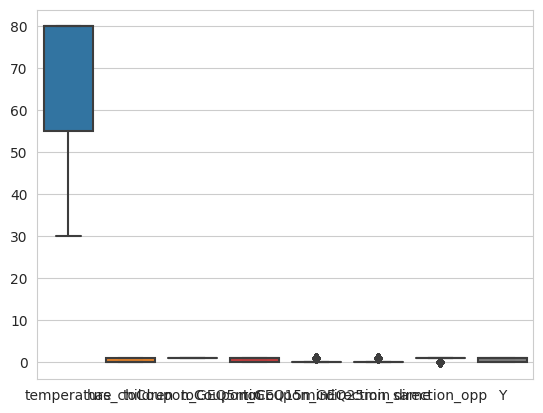

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object
Constant columns: Index(['toCoupon_GEQ5min'], dtype='object')


In [12]:
#To investigate dataset for missing or problematic data you can do below

#1. Use isnull() to check for missing values.

#2. Visualize missing data with seaborn or matplotlib.

#3. Check for duplicates.

#4. Check descriptive statistics and visualize outliers.

#5. Verify correct data types.

#6. Check for constant columns.

# 1. Check for missing data
missing_data = data.isnull().sum()

# Show missing data per column
print(f"Missing data columns are")
print(missing_data)


#3. Check for duplicates
duplicate_data = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_data}")

#4. Check descriptive statistics and visualize outliers.
print(data.describe())

# Visualize outliers using boxplot for numeric columns
sns.boxplot(data=data)
plt.show()

#5. Check data types of columns
print(data.dtypes)

#6. Check for constant columns
constant_columns = data.columns[data.nunique() == 1]
print(f"Constant columns: {constant_columns}")

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
#If any duplicates exist, you can remove them:

# Remove duplicate rows
data = data.drop_duplicates()

# Drop Car column as it is not relevant to the analysis
data = data.drop(columns=['car'])

#  List columns having missing data
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

# Fill in data with the mode
for column in missing_data.index:
    data[column] = data[column].fillna(data[column].mode()[0])
    
data['Bar'] = data['Bar'].fillna('never')

#Replace the age column with values and change the column to a integer type
data['age'] = data['age'].replace({'50plus': 55, 'below21': 20})
data['age'] = pd.to_numeric(data['age'], errors='coerce', downcast='integer')
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [14]:
# Calculate the proportion of observations that accepted the coupon (Y=1)
acceptance_rate = data['Y'].mean()
acceptance_rate


0.5675654242664552

5. Use a bar plot to visualize the `coupon` column.

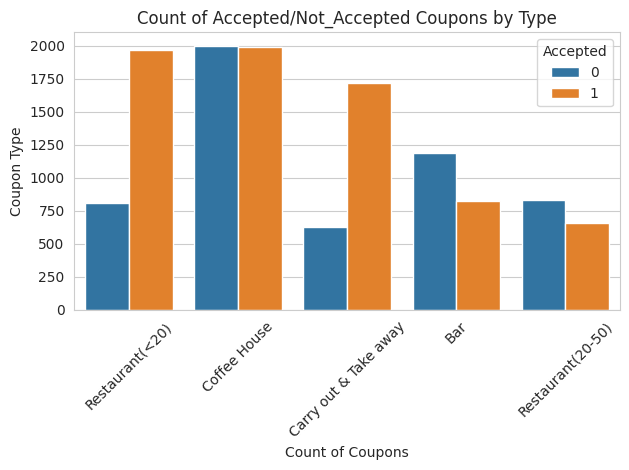

In [15]:
#Coffee House coupon is 50/50 but the Restaurant <$20 and the Take Out coupons successful.
coupon_chart = sns.countplot(data = data, hue='Y', x='coupon')
plt.xlabel('Count of Coupons')
plt.ylabel('Coupon Type')
plt.title('Count of Accepted/Not_Accepted Coupons by Type')
plt.legend(title='Accepted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/CouponAcceptanceByType.png')


6. Use a histogram to visualize the temperature column.

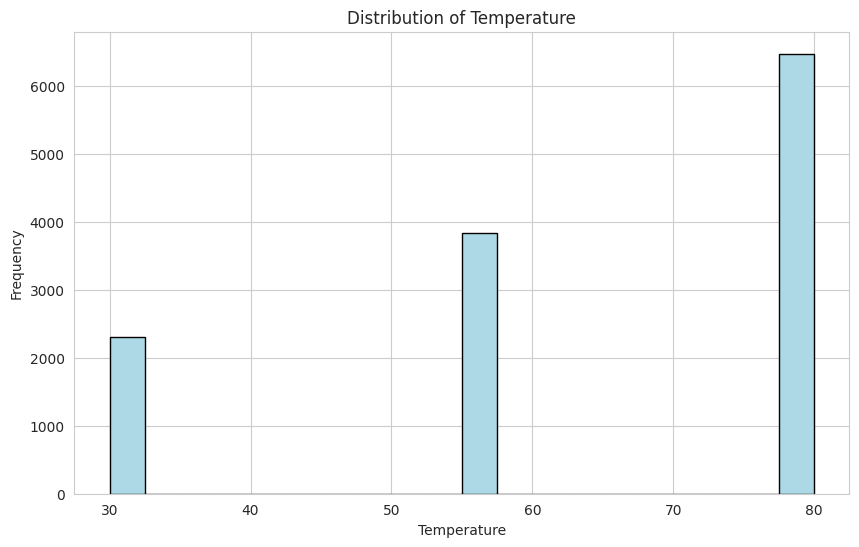

In [16]:
# Histogram to visualize the temperature column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [18]:
# Calculate the proportion of observations that accepted the coupon (Y=1)
acceptance_rate = bar_coupons_df['Y'].mean()
acceptance_rate

print(f"Proportion of bar coupons that were accepted: {acceptance_rate:.2f}")

Proportion of bar coupons that were accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# Clean the 'Bar' column by mapping categorical values to numeric groups
bar_mapping = {
    'never': 0,
    'less1': 0,
    '1~3': 0,
    '4~8': 1,
    'gt8': 1
}

# Drop NaN values in 'Bar' to avoid errors
bar_coupons_df_filtered = bar_coupons_df.dropna(subset=['Bar']).copy()

# Apply the mapping
bar_coupons_df_filtered['Bar_Group'] = bar_coupons_df_filtered['Bar'].map(bar_mapping)

# Calculate acceptance rates for each group
acceptance_rates = bar_coupons_df_filtered.groupby('Bar_Group')['Y'].mean()
acceptance_rates


Bar_Group
0    0.370514
1    0.768844
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
# Define bar categories for those who go more than once a month
bar_frequent = ['1~3', '4~8', 'gt8']

# Create the two groups
group1 = data[(data['Bar'].isin(bar_frequent)) & (data['age'] > 25)]
group2 = data[~((data['Bar'].isin(bar_frequent)) & (data['age'] > 25))]

# Compare acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

acceptance_rate_group1, acceptance_rate_group2


(0.6201662450307192, 0.5527786244031291)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:
# Define bar categories for those who go more than once a month
bar_frequent = ['1~3', '4~8', 'gt8']

# Exclude passengers who were kids
non_kid_passengers = data['passanger'] != 'Kid(s)'

# Exclude specific occupations
non_farm_fish_forestry = data['occupation'] != 'Farming Fishing & Forestry'

# Create the two groups
group1 = data[(data['Bar'].isin(bar_frequent)) & non_kid_passengers & non_farm_fish_forestry]
group2 = data[~((data['Bar'].isin(bar_frequent)) & non_kid_passengers & non_farm_fish_forestry)]

# Compare acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

acceptance_rate_group1, acceptance_rate_group2


(0.6222523744911804, 0.5449859943977591)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [22]:

# Define frequent bar-goers and restaurant visitors
bar_frequent = ['1~3', '4~8', 'gt8']
restaurant_frequent = ['4~8', 'gt8']

# Convert income to numeric
data['income'] = data['income'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Define the group based on the given conditions
group1 = data[
    (data['Bar'].isin(bar_frequent) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')) |
    (data['Bar'].isin(bar_frequent) & (data['age'] < 30)) |
    (data['RestaurantLessThan20'].isin(restaurant_frequent) & (data['income'] < 50000))
]

# Define the comparison group (everyone else)
group2 = data[~data.index.isin(group1.index)]

# Calculate acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()

acceptance_rate_group1, acceptance_rate_group2

(0.6047915855083755, 0.5420010700909578)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [23]:
print ('Frequent Bar Visitors Are More Likely to Accept Coupons')
print('')
print('Drivers who go to bars more than once a month and had passengers that were not a kid accepted more coupons. This suggests drivers who travel with company may be more inclined to accept bar coupons.')
print('')
print ('Drivers who visit cheap restaurants and earn <$50K have higher acceptance rate. This suggests that people with lower incomes and frequent dining habits might be more inclined to use coupons')

Frequent Bar Visitors Are More Likely to Accept Coupons

Drivers who go to bars more than once a month and had passengers that were not a kid accepted more coupons. This suggests drivers who travel with company may be more inclined to accept bar coupons.

Drivers who visit cheap restaurants and earn <$50K have higher acceptance rate. This suggests that people with lower incomes and frequent dining habits might be more inclined to use coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

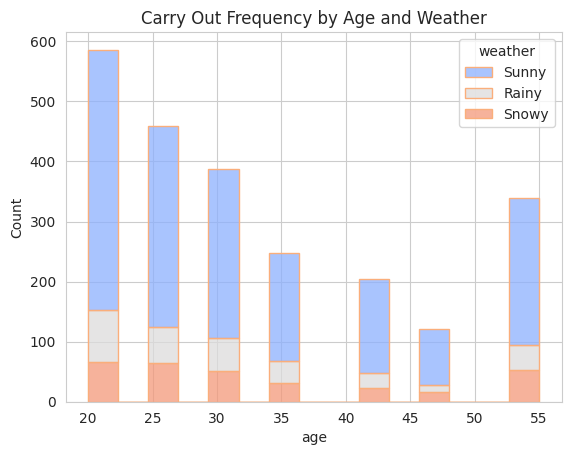

In [24]:

# Filter data for "Carry out & Take away" coupon
carryout_coupons_df = data[data['coupon'] == 'Carry out & Take away']

# Plot the data using a stacked bar plot
ax = sns.histplot(carryout_coupons_df, x='age', hue='weather', multiple='stack', palette='coolwarm', edgecolor='#FAAE7B')

# Set plot title
plt.title('Carry Out Frequency by Age and Weather')

# Save the plot
plt.savefig('images/CarryOutWeatherComparison.png')


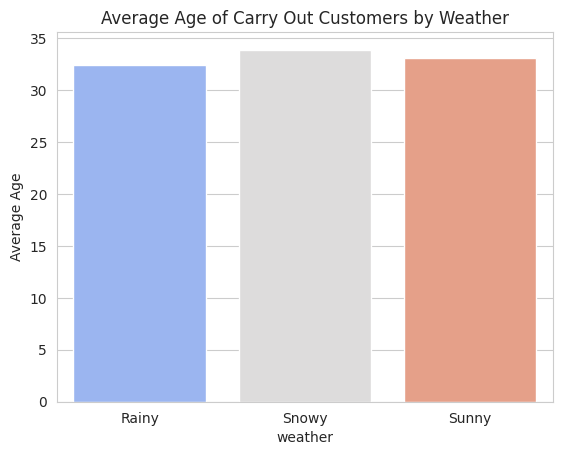

In [25]:
# Group data by weather and calculate the average age
weather_group = carryout_coupons_df.groupby('weather')['age'].mean().reset_index()

# Plot the data using a bar plot
sns.barplot(data=weather_group, x='weather', y='age', palette='coolwarm')

# Set plot title
plt.title('Average Age of Carry Out Customers by Weather')
plt.ylabel('Average Age') # Update y-axis label

# Save the plot
plt.savefig('images/AverageAgeCarryOutWeatherBarPlot.png')

plt.show() # To display the plot



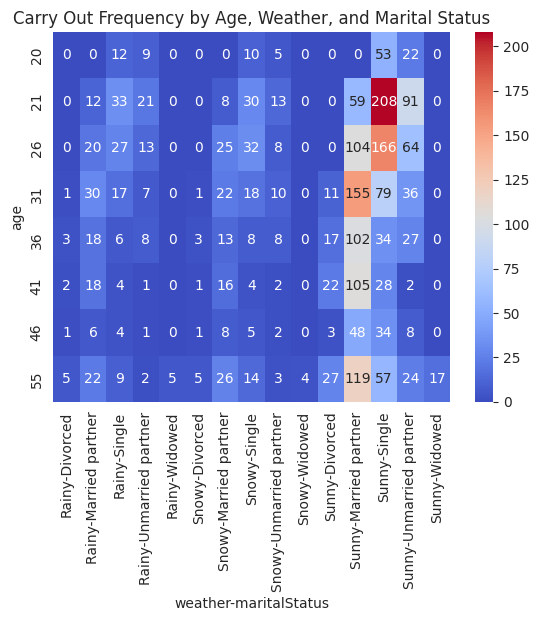

<Figure size 640x480 with 0 Axes>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the data: count the number of carryout visits based on weather, maritalStatus, and age
carryout_counts = carryout_coupons_df.groupby(['age', 'weather', 'maritalStatus']).size().reset_index(name='count')

# Pivot the data for heatmap plotting
heatmap_data = carryout_counts.pivot_table(index='age', columns=['weather', 'maritalStatus'], values='count', aggfunc='sum', fill_value=0)

# Create the heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')

# Set title and labels
plt.title('Carry Out Frequency by Age, Weather, and Marital Status')

# Display the plot
plt.show()
plt.savefig('images/CarryOutAgeWeatherMaritalStatusFacetGrid.png')


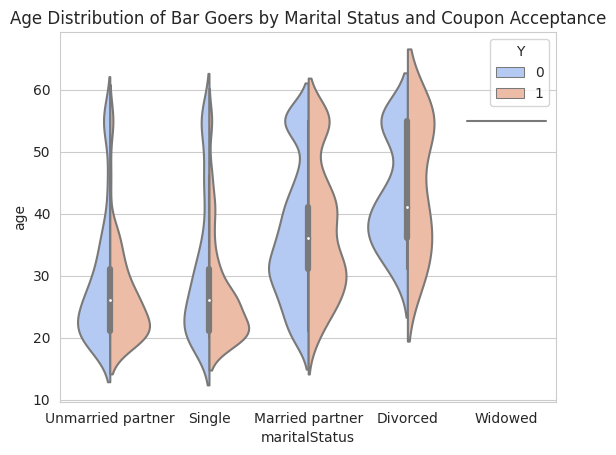

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to focus on bar goers
bar_goers_df = data[data['coupon'] == 'Bar']

# Create a violin plot to compare the distribution of age and income for bar goers
sns.violinplot(data=bar_goers_df, x='maritalStatus', y='age', hue='Y', split=True, palette='coolwarm')

# Set plot title
plt.title('Age Distribution of Bar Goers by Marital Status and Coupon Acceptance')

# Save and display the plot
plt.savefig('images/BarGoersAgeDistribution.png')
plt.show()


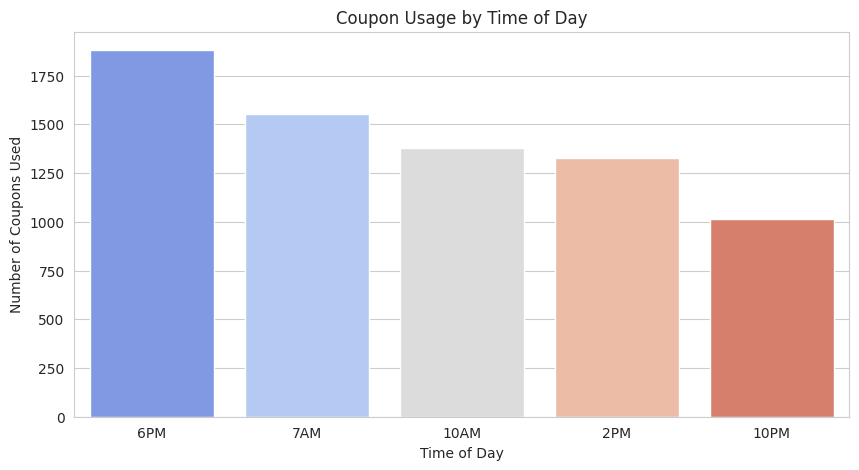

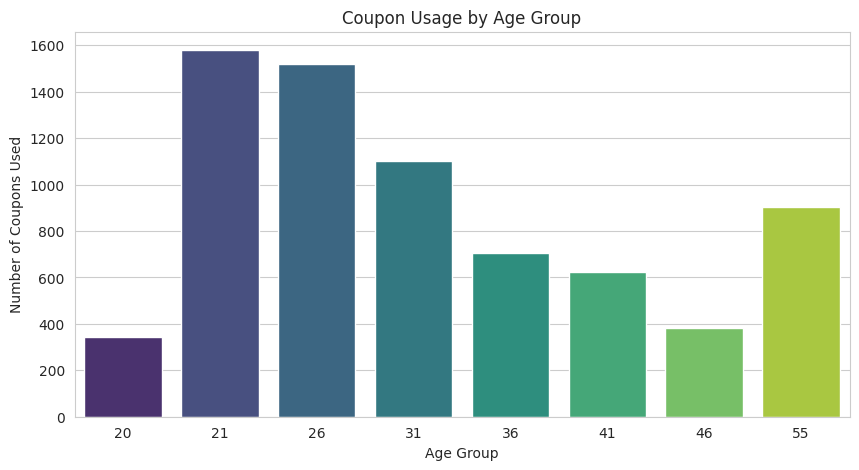

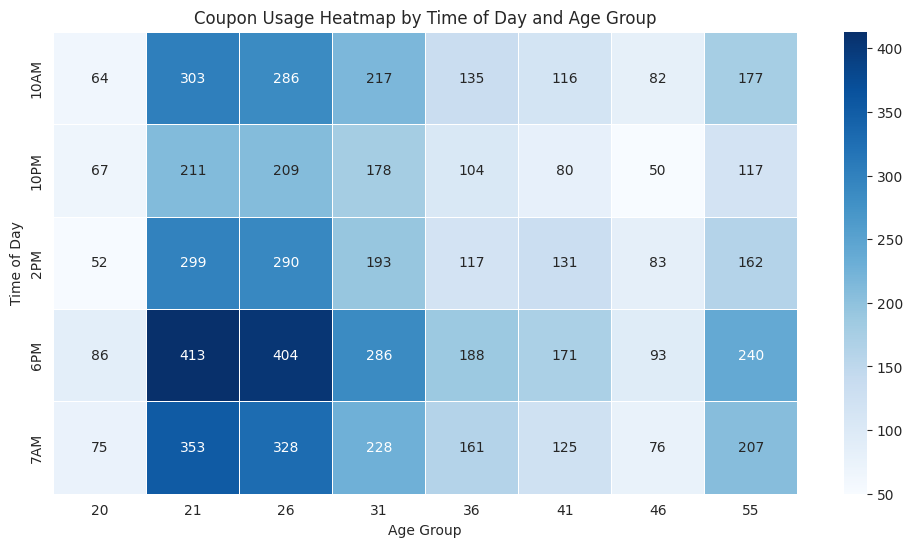

In [28]:
# Analyze coupon usage by time of day
time_usage = data.groupby("time")["Y"].sum().sort_values(ascending=False)

# Analyze coupon usage by age group
age_usage = data.groupby("age")["Y"].sum().sort_values(ascending=False)

# Analyze coupon usage by both time and age group
time_age_usage = data.groupby(["time", "age"])["Y"].sum().unstack()

# Set style
sns.set_style("whitegrid")

# Plot coupon usage by time of day
plt.figure(figsize=(10, 5))
sns.barplot(x=time_usage.index, y=time_usage.values, palette="coolwarm")
plt.title("Coupon Usage by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Coupons Used")
plt.savefig('images/CouponUsageTimeOfDay.png')

# Plot coupon usage by age group
plt.figure(figsize=(10, 5))
sns.barplot(x=age_usage.index, y=age_usage.values, palette="viridis")
plt.title("Coupon Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Coupons Used")
plt.savefig('images/CouponUsageAge.png')

# Heatmap of coupon usage by time and age group
plt.figure(figsize=(12, 6))
sns.heatmap(time_age_usage, cmap="Blues", annot=True, fmt="d", linewidths=0.5)
plt.title("Coupon Usage Heatmap by Time of Day and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time of Day")
plt.savefig('images/CouponUsageHeatMapTimeAndAge.png')